In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
h = unp.uarray([920, 930, 938.3, 943.1], 0.1)  # mm
I = unp.uarray([0.3e-9, 0.42e-9, 0.67e-9, 1.1e-9], [0.02e-9, 0.02e-9, 0.02e-9, 0.2e-9])  # A
Iinv = 1/I

955.0000000000007 947.6056338028171 970.4411764705891 7.394366197183558 15.441176470588402


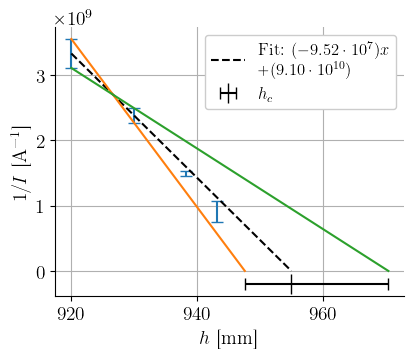

952.2439999999993 949.7859273921016 955.7649540142445 2.4580726078977477 3.5209540142451488


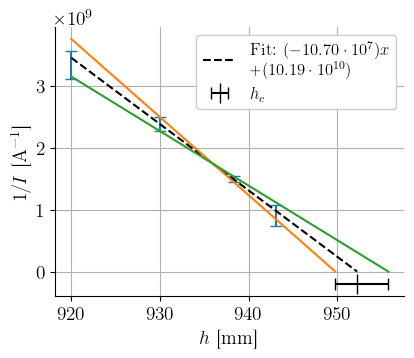

950.5790697674419 947.6005639490356 956.9034593209481 2.9785058184062336 6.324389553506194


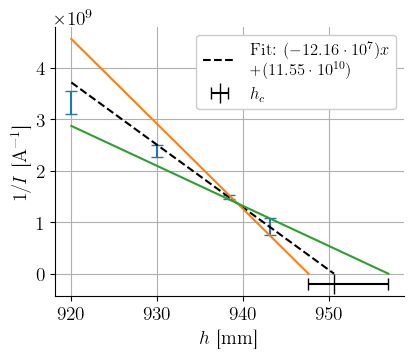

In [3]:
hc_est = np.zeros((len(h)-1, 3))
for i in range(len(h) - 1):  # basically pairwise
    coefs1 = np.polyfit(nom_vals(h[i:i+2]), nom_vals(1/I[i:i+2]), 1)
    hc_avg = -coefs1[1]/coefs1[0]

    coefs2 = np.polyfit(nom_vals(h[i:i+2]), [Iinv[i].n + Iinv[i].s, Iinv[i+1].n - Iinv[i+1].s], 1)
    hc_low = -coefs2[1]/coefs2[0]

    coefs3 = np.polyfit(nom_vals(h[i:i+2]), [Iinv[i].n - Iinv[i].s, Iinv[i+1].n + Iinv[i+1].s], 1)
    hc_high = -coefs3[1]/coefs3[0]

    print(hc_avg, hc_low, hc_high, abs(hc_avg - hc_low), abs(hc_avg - hc_high))
    hc_est[i] = (hc_avg, hc_low, hc_high)

    # fuck it show it all
    plt.errorbar(nom_vals(h), nom_vals(Iinv), yerr=std_devs(Iinv), linestyle='none')

    x_avg = np.linspace(920, hc_avg)
    plt.plot(x_avg, np.poly1d(coefs1)(x_avg), '--', color='k', label=f"Fit: $({coefs1[0]*1e-7:.2f} \\cdot 10^7) x$\n$+ ({coefs1[1]*1e-10:.2f} \\cdot 10^{{10}})$")
    x_low = np.linspace(920, hc_low)
    plt.plot(x_low, np.poly1d(coefs2)(x_low))
    x_high = np.linspace(920, hc_high)
    plt.plot(x_high, np.poly1d(coefs3)(x_high))
    
    plt.errorbar([hc_avg], [-2e8], xerr=[[hc_avg-hc_low], [hc_high-hc_avg]], color='k', fmt='|', label='$h_c$')

    plt.xlabel(r'$h$ [mm]')
    plt.ylabel(r'$1/I$ [\si{\per\ampere}]')
    plt.legend()
    plt.grid()

    plt.savefig(f'../figures/h_I_pair{i+1}{i+2}.pdf')
    plt.show()

# trouvé: hc = 952.2
# aussi retrouvé nice

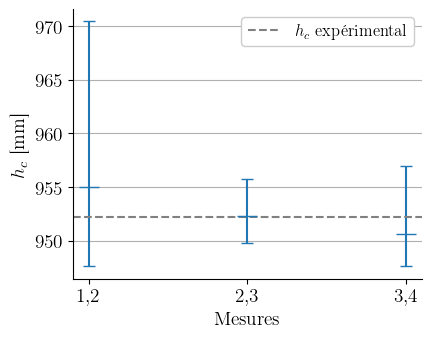

In [4]:
plt.errorbar(['1,2', '2,3', '3,4'], hc_est[:,0], yerr=np.abs(hc_est[:,1:].T - hc_est[:,0]), fmt='_')
plt.axhline(952.2, linestyle='--', label='$h_c$ expérimental')

plt.xlabel(r'Mesures')
plt.ylabel(r'$h_c$ [mm]')
plt.legend()
plt.grid(axis='y')
plt.savefig('../figures/hc_results_I.pdf')

In [5]:
', '.join(map(str, unp.uarray(hc_est[:,0], np.max(np.abs(hc_est[:,1:].T - hc_est[:,0]), axis=0))))

'955+/-15, 952.2+/-3.5, 951+/-6'